<a href="https://colab.research.google.com/github/TiagoDeserth/Ci-ncia-de-Dados/blob/main/Ci%C3%AAncia_dos_Dados_Aula_1_(05_08_2022)_%7C_Aula_2_(12_08_22)_%7C_Aula_3_(19_08_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciência dos Dados


1.   Estatística
2.   Mineração de Dados
3.   Machine Learning
4.   KDD
5.   Limpeza, transformação, visualização





#Revisão: Estatística, Pandas, Ferramentas de Visualização, etc

##Análise dos Dados

Análise de dados de maneira exploratória: técnica que consiste em analisar e investigar conjuntos de dados e resumir suas principais características. Permite determinar a melhor forma de controlar as fontes de dados para obter as respostas que você precisa, tornando mais fácil aos cientistas de dados descobrir padrões, detectar anomalias, testar uma hipótese ou verificar suposiões.

#Analisando as notas em geral

In [ ]:
import pandas as pd #tratamento de dados
import seaborn as sns #visualização de gráficos
import matplotlib.pyplot as plt #visualização de gráficos

In [ ]:
#Leitura de arquivos
notas = pd.read_csv("ratings.csv")

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Tipo de dados
type(notas)

pandas.core.frame.DataFrame

In [ ]:
#Informações
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
#Informações
notas.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
tipos=pd.DataFrame(notas.dtypes, columns = ['Tipos de Dados'])
tipos

,Tipos de Dados
userId,int64
movieId,int64
rating,float64
timestamp,int64


In [ ]:
#Quantidade de linhas e colunas
tipos.shape

(4, 1)

In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
serie_nota = notas['nota']
serie_nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
type(serie_nota)

pandas.core.series.Series

In [ ]:
#Notas existentes
serie_nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
#Ordenando as notas
sorted(serie_nota.unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [ ]:
#Quantidade das notas dadas aos filmes
serie_nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
#Médias das notas
notas['nota'].mean()

3.501556983616962

In [ ]:
#Médias das notas (outra maneira)
notas.nota.mean()

3.501556983616962

In [ ]:
#Verificação de dados nulos (um por um)
notas['nota'].isnull().unique()

array([False])

In [ ]:
#Inverso
notas['nota'].notnull()

0         True
1         True
2         True
3         True
4         True
          ... 
100831    True
100832    True
100833    True
100834    True
100835    True
Name: nota, Length: 100836, dtype: bool

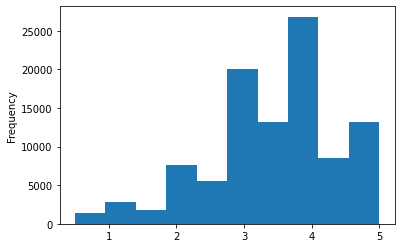

In [ ]:
notas['nota'].plot(kind = 'hist')

In [ ]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].mean())

Média 3.501556983616962
Mediana 3.501556983616962


In [ ]:
notas['Desvio Absoluto'] = notas['nota']-notas['nota'].mean()
notas
notas.to_csv('Teste.csv')

In [ ]:
#Excluindo a coluna criada (Desvio Absoluto)
notas.pop('Desvio Absoluto')

0         0.498443
1         0.498443
2         0.498443
3         1.498443
4         1.498443
            ...   
100831    0.498443
100832    1.498443
100833    1.498443
100834    1.498443
100835   -0.501557
Name: Desvio Absoluto, Length: 100836, dtype: float64

In [ ]:
notas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, np.nan],
                  [np.nan, 3, np.nan, 4]], columns = list('ABCD'))
df.fillna({'A':0})
#Substituição de NaN para o valor '0', da coluna 'A'

,A,B,C,D
0,0.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,0.0,NaN,NaN,NaN
3,0.0,3.0,NaN,4.0


In [ ]:
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, np.nan],
                  [np.nan, 3, np.nan, 4]], columns = list('ABCD'))
df.dropna(subset=['D'])

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
3,NaN,3.0,NaN,4.0


In [ ]:
#Informações geral
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


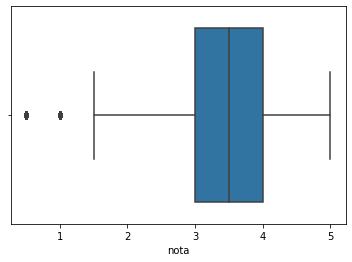

In [ ]:
sns.boxplot(notas.nota)

In [ ]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()
filmes.shape

(9742, 3)

In [ ]:
#Removendo dados duplicados
filmes.drop_duplicates(inplace=True)
filmes.shape

(9742, 3)

In [ ]:
#Filmes com id=1 com a média de suas notas
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [ ]:
filmes.query("filmeId==1")

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
#Média das notas de cada filme
medias_por_filme = notas.groupby("filmeId").mean().nota
df2=medias_por_filme.reset_index()
df2=df2.set_index('filmeId')
medias_por_filme.shape

(9724,)

In [ ]:
filmes=filmes.set_index('filmeId')

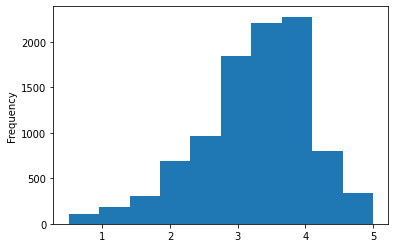

In [ ]:
medias_por_filme.plot(kind = 'hist')

In [ ]:
df3=pd.concat([filmes, df2], axis=1)

In [ ]:
df3.to_csv('Teste - 3.csv')

In [ ]:
filmes.shape

(9742, 2)

In [ ]:
df2.shape

(9724, 1)

In [ ]:
df2.query("filmeId==182823")

,nota
filmeId,
182823,2.875


In [ ]:
#Encontrando a lista de filmes sem notas
select=df3['nota'].isnull()

In [ ]:
df3[select]

,titulo,generos,nota
filmeId,,,
1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2939,Niagara (1953),Drama|Thriller,NaN
3338,For All Mankind (1989),Documentary,NaN
3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
5721,"Chosen, The (1981)",Drama,NaN
6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
7020,Proof (1991),Comedy|Drama|Romance,NaN


In [ ]:
#Mostrando o filme sem nota
df2.query("filmeId==1076")

,nota
filmeId,


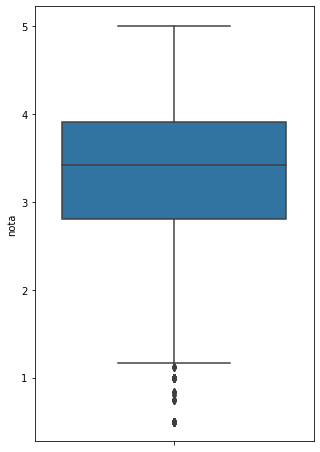

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [ ]:
#Filmes que obtiveram a menor nota
df3.query('nota=='+str(medias_por_filme.min()))

,titulo,generos,nota
filmeId,,,
3604,Gypsy (1962),Musical,0.5
3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,0.5
4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.5
4371,Baby Boy (2001),Crime|Drama,0.5
4580,Cyborg (1989),Action|Sci-Fi,0.5
...,...,...,...
165645,Bad Santa 2 (2016),Comedy,0.5
167296,Iron Man (1931),Drama,0.5
173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


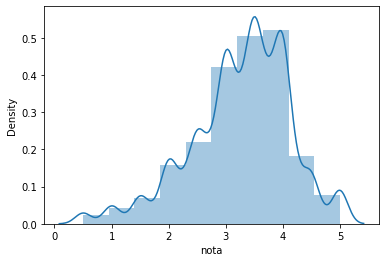

In [ ]:
#Bins: números de classes
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

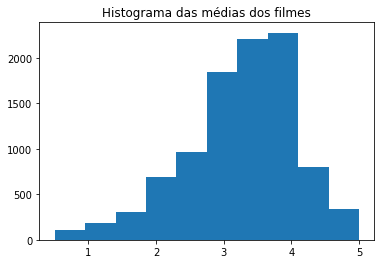

In [ ]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [ ]:
tmdb=pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
#Quantidade de filmes contidos em cada linguagem
group_language=tmdb.groupby('original_language')
group_language.groups

{'af': [3936], 'ar': [4164, 4206], 'cn': [1357, 1955, 2013, 2184, 2262, 2309, 3099, 3309, 3400, 3463, 3714, 4078], 'cs': [2906, 3673], 'da': [2665, 3155, 3197, 3870, 4270, 4586, 4686], 'de': [1011, 1353, 1676, 2277, 2378, 2638, 2724, 2860, 3330, 3410, 3429, 3440, 3655, 3674, 3730, 3952, 4031, 4035, 4070, 4081, 4151, 4189, 4257, 4417, 4431, 4457, 4677], 'el': [4605], 'en': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, ...], 'es': [492, 1462, 1463, 1741, 2064, 2465, 2512, 2725, 3113, 3149, 3524, 3562, 3596, 3657, 3703, 3761, 3794, 3839, 3844, 3880, 3943, 4003, 4066, 4089, 4174, 4192, 4226, 4260, 4294, 4404, 4416, 4798], 'fa': [4438, 4452, 4695, 479

In [ ]:
#Quantidade de filmes contidos em cada linguagem (melhorado)
for name, group in group_language:
  print('{} tem {} filmes'.format(name, group.id.count()))

af tem 1 filmes
ar tem 2 filmes
cn tem 12 filmes
cs tem 2 filmes
da tem 7 filmes
de tem 27 filmes
el tem 1 filmes
en tem 4505 filmes
es tem 32 filmes
fa tem 4 filmes
fr tem 70 filmes
he tem 3 filmes
hi tem 19 filmes
hu tem 1 filmes
id tem 2 filmes
is tem 1 filmes
it tem 14 filmes
ja tem 16 filmes
ko tem 11 filmes
ky tem 1 filmes
nb tem 1 filmes
nl tem 4 filmes
no tem 1 filmes
pl tem 1 filmes
ps tem 1 filmes
pt tem 9 filmes
ro tem 2 filmes
ru tem 11 filmes
sl tem 1 filmes
sv tem 5 filmes
ta tem 2 filmes
te tem 1 filmes
th tem 3 filmes
tr tem 1 filmes
vi tem 1 filmes
xx tem 1 filmes
zh tem 27 filmes


In [ ]:
for name, group in group_language:
  print('{} Popularidade média {}'.format(name, group.popularity.mean()))

af Popularidade média 2.504169
ar Popularidade média 4.7233885
cn Popularidade média 10.631343083333334
cs Popularidade média 1.2868485
da Popularidade média 17.663925142857142
de Popularidade média 10.15138162962963
el Popularidade média 28.858238
en Popularidade média 22.177434699445058
es Popularidade média 13.330803812500001
fa Popularidade média 5.664415
fr Popularidade média 10.299542171428573
he Popularidade média 5.364953333333333
hi Popularidade média 2.994144105263158
hu Popularidade média 1.906807
id Popularidade média 24.586253
is Popularidade média 1.617943
it Popularidade média 17.818267714285714
ja Popularidade média 25.663787625
ko Popularidade média 19.488720363636364
ky Popularidade média 0.077873
nb Popularidade média 12.982319
nl Popularidade média 4.7689785
no Popularidade média 11.205726
pl Popularidade média 13.265432
ps Popularidade média 1.447734
pt Popularidade média 11.309857333333333
ro Popularidade média 4.7988775
ru Popularidade média 7.567723545454545
sl 

In [ ]:
group_language['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
original_language,,,,,,,,
af,1.0,2.504169,NaN,2.504169,2.504169,2.504169,2.504169,2.504169
ar,2.0,4.723389,0.238740,4.554574,4.638981,4.723389,4.807796,4.892203
cn,12.0,10.631343,6.175637,0.542814,7.032095,10.429819,15.614669,19.167377
cs,2.0,1.286849,1.556504,0.186234,0.736541,1.286849,1.837156,2.387463
da,7.0,17.663925,14.530984,3.225189,7.040198,10.240917,29.000243,38.100488
de,27.0,10.151382,11.567655,0.153625,1.560484,5.025938,14.516695,34.938177
el,1.0,28.858238,NaN,28.858238,28.858238,28.858238,28.858238,28.858238
en,4505.0,22.177435,32.512782,0.000000,5.000500,13.668633,29.253833,875.581305
es,32.0,13.330804,17.022446,0.015597,2.026883,9.367127,19.209190,90.809408


In [ ]:
group_language['popularity'].aggregate(['min', 'max'])

,min,max
original_language,,
af,2.504169,2.504169
ar,4.554574,4.892203
cn,0.542814,19.167377
cs,0.186234,2.387463
da,3.225189,38.100488
de,0.153625,34.938177
el,28.858238,28.858238
en,0.000000,875.581305
es,0.015597,90.809408


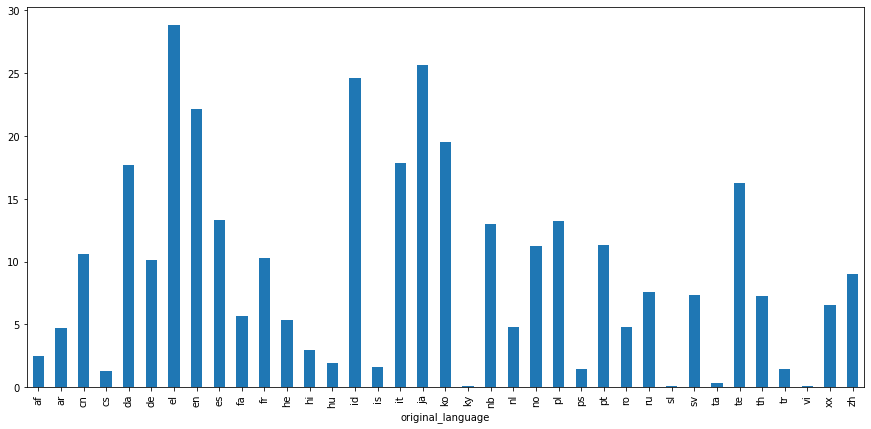

In [ ]:
plt.figure(figsize=(15,7))
group_language['popularity'].mean().plot.bar()

Variável categórica ordinal

#Primeiro Grau Completo
#Segundo Grau Completo
#Terceiro Grau Completo
#...

Variável quantitativa contínua

In [ ]:
tmdb.budget.unique()

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

Variável quantitativa discreta

In [ ]:
tmdb.vote_count.unique()

array([11800,  4500,  4466, ...,   587,  1708,  2078])

#Aula 3 - (19/08/22)

#Data Visualization

In [ ]:
#Quantidade de filmes em cada línguas
tmdb["original_language"].value_counts() #Primeira maneira de fazer 
contagem_lingua=tmdb["original_language"].value_counts().to_frame().reset_index() #Segunda maneira de fazer
contagem_lingua.index=range(1, contagem_lingua.shape[0]+1)
contagem_lingua.columns = ['Original_Language', 'Total']
contagem_lingua

,Original_Language,Total
1,en,4505
2,fr,70
3,es,32
4,zh,27
5,de,27
6,hi,19
7,ja,16
8,it,14
9,cn,12
10,ru,11


#Biblioteca Seaborn (Visualização com Gráficos)
https://seaborn.pydata.org/tutorial/categorical.html


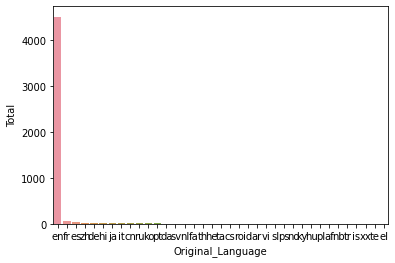

In [ ]:
sns.barplot(x="Original_Language", y="Total", data=contagem_lingua)

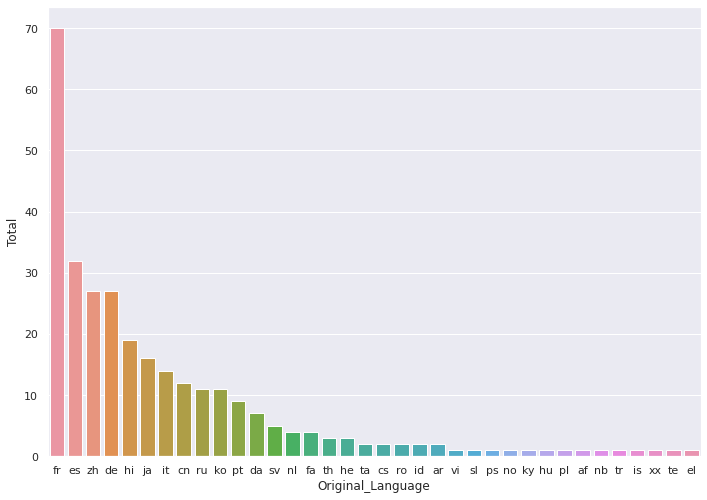

In [ ]:
#Excluindo os EUA para melhor visualização
sns.set(rc={'figure.figsize':(11.7, 8.27)}) #Aumentando o tamanho do gráfico
sns.barplot(x="Original_Language", y="Total", data=contagem_lingua[1:])

([<matplotlib.patches.Wedge at 0x7f0ba9aa1c90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

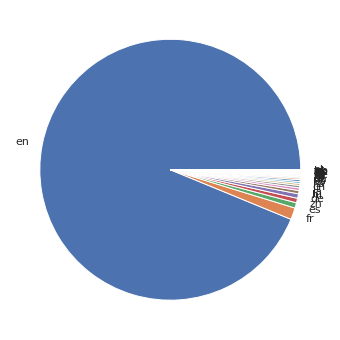

In [ ]:
sns.set(rc={'figure.figsize':(8, 6)})
plt.pie(contagem_lingua["Total"], labels=contagem_lingua["Original_Language"])

In [ ]:
#Excluindo o inglês da contagem do total
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles=total_por_lingua.loc["en"]
total_do_resto = total_geral-total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [ ]:
#Criando um novo dataframe com os dados retirados do código anterior
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


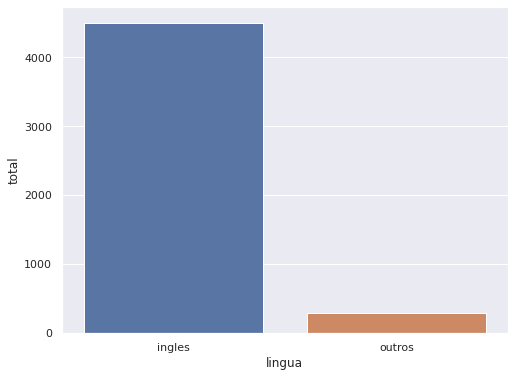

In [ ]:
#Gráfico com melhor visualização da situação anterior
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x7f0ba9445b10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

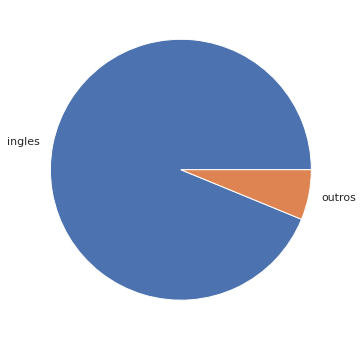

In [ ]:
#Gráfico com melhor visualização da situação anterior (gráfico de torta)
sns.set(rc={'figure.figsize':(8, 6)})
plt.pie(dados["total"], labels=dados["lingua"])

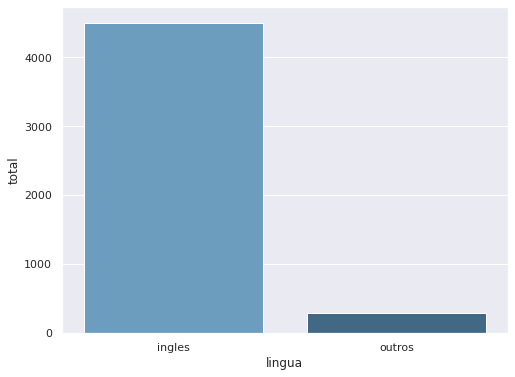

In [ ]:
#Mudando a cor do gráfico (palette)
sns.barplot(x="lingua", y="total", data=dados, palette="Blues_d")

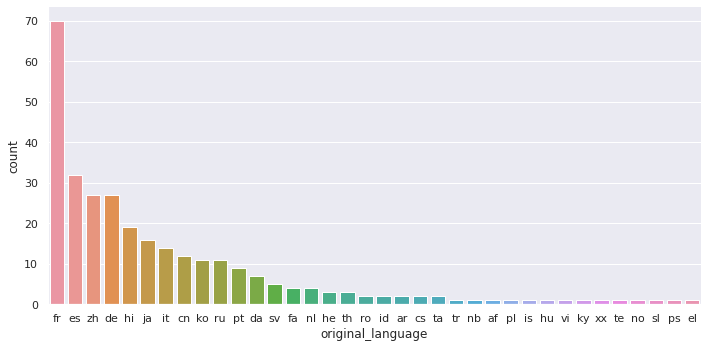

In [ ]:
#Gráfico de categorias (catplot)
#(aspect) = aumento da largura do gráfico
total_por_lingua_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_outros_filmes
filmes_lingua_outros=tmdb.query("original_language != 'en'")
sns.catplot(x='original_language', data=filmes_lingua_outros, aspect=2, order=total_por_lingua_outros_filmes.index, kind="count")

In [ ]:
#Busca nos dados a partir do parâmetro "loc"
notas.head()
notas.loc[[0, 4]]

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
4,1,50,5.0,964982931


In [ ]:
#Busca a partir dos índices desejados
notas.iloc[[0, 4], [0,2]]

,usuarioId,nota
0,1,4.0
4,1,5.0


In [ ]:
#Filtro para mostrar filmes somente com notas 4 ou 5
selecao=notas['filmeId'].isin([70, 223])
notas_selecao = notas[selecao]
notas_selecao

,usuarioId,filmeId,nota,momento
5,1,70,3.0,964982400
12,1,223,3.0,964980985
1075,9,223,4.0,1044656650
1781,18,70,3.5,1455735732
1790,18,223,4.0,1455617470
...,...,...,...,...
97380,606,70,4.0,1171733439
97402,606,223,4.5,1171322828
98684,608,70,3.0,1117415406
98713,608,223,2.5,1117491315
